In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import itertools

In [2]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';')

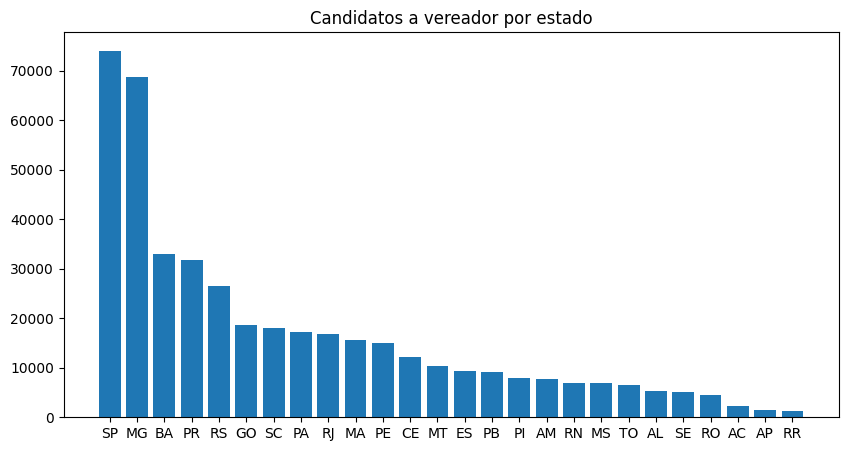

In [3]:
df_candidatos_vereador_by_uf = df[df["DS_CARGO"]== "VEREADOR"][["SG_UF", "NM_URNA_CANDIDATO"]].\
                                groupby(["SG_UF"]).count().\
                                sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(df_candidatos_vereador_by_uf.index, df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"], width=0.8)
ax.set_title("Candidatos a vereador por estado")
plt.show();

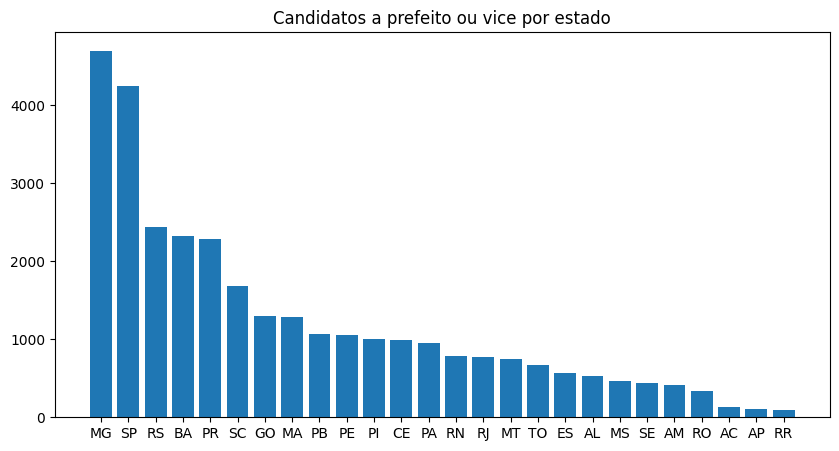

In [4]:
df_candidatos_prefeitura_by_uf = df[df["DS_CARGO"] != "VEREADOR"][["SG_UF", "NM_URNA_CANDIDATO"]]\
                                .groupby(["SG_UF"]).count()\
                                .sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(df_candidatos_prefeitura_by_uf.index, df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"], width=0.8)
ax.set_title("Candidatos a prefeito ou vice por estado")
plt.show()

In [5]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.merge(populcacao_por_estados, on="SG_UF")

,SG_UF,NUMERO DE CANDIDATOS,POPULACAO
0,AC,2183,830018
1,AL,5310,3127683
2,AM,7691,3941613
3,AP,1486,733759
4,BA,32879,14141626
5,CE,12223,8794957
6,ES,9291,3833712
7,GO,18668,7056495
8,MA,15543,6775805
9,MG,68741,20538718


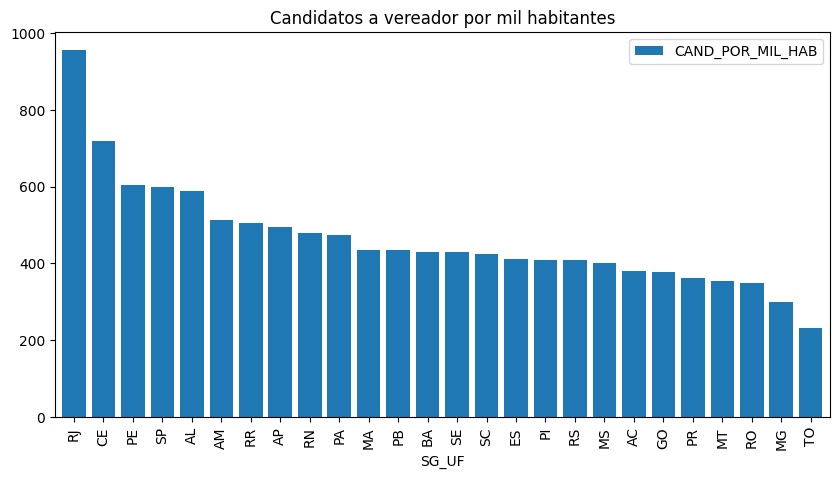

In [6]:
display(df_candidatos_vereador_by_uf.rename(columns={"NM_URNA_CANDIDATO": "NUMERO DE CANDIDATOS"}).sort_values(by="SG_UF").reset_index(drop=True))
df_candidatos_vereador_by_uf.assign(CAND_POR_MIL_HAB = lambda x : round(x.POPULACAO/x.NM_URNA_CANDIDATO, 2))\
                            .sort_values(by="CAND_POR_MIL_HAB", ascending=False)\
                            .plot("SG_UF", "CAND_POR_MIL_HAB", kind="bar", title="Candidatos a vereador por mil habitantes",\
                                  width=0.8, figsize=(10, 5));

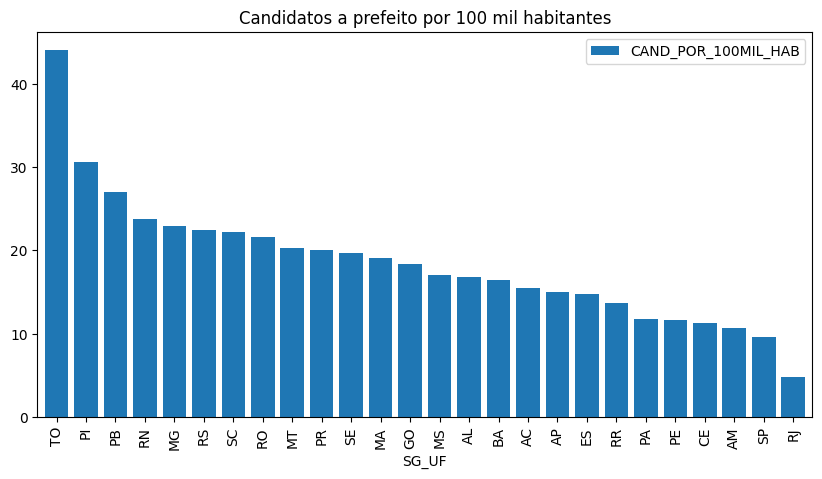

In [7]:
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.merge(populcacao_por_estados, on="SG_UF")
df_candidatos_prefeitura_by_uf.assign(CAND_POR_100MIL_HAB = lambda x: round(x["NM_URNA_CANDIDATO"]/(x["POPULACAO"]/100000), 2))\
                              .sort_values(by="CAND_POR_100MIL_HAB", ascending=False)\
                              .plot("SG_UF", "CAND_POR_100MIL_HAB", kind="bar", title ="Candidatos a prefeito por 100 mil habitantes",\
                                    figsize=(10, 5), width=0.8);

In [8]:
df_pop_grandes_cidades = pd.read_csv("populacao_grandes_cidades.csv", sep=";")
df_pop_grandes_cidades["CIDADE"] = df_pop_grandes_cidades["CIDADE"].apply(lambda x : x.upper())
df_pop_grandes_cidades

,CIDADE,POPULACAO
0,SÃO PAULO,11451999
1,RIO DE JANEIRO,6211223
2,BRASÍLIA,2817381
3,FORTALEZA,2428708
4,SALVADOR,2417678
...,...,...
314,MANACAPURU,101883
315,BALSAS,101767
316,LAGARTO,101579
317,ASSIS,101409


In [9]:
lista_de_cidades = list(df_pop_grandes_cidades["CIDADE"])
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
df_cand_vereador_grandes_cidades = df_candidatos_vereador[["NM_UE", "NM_URNA_CANDIDATO"]][df_candidatos_vereador["NM_UE"].isin(lista_de_cidades)]\
                                  .groupby(["NM_UE"]).count()\
                                  .rename(columns={"NM_URNA_CANDIDATO" : "NUMERO DE CANDIDATOS"})\
                                  .merge(df_pop_grandes_cidades, right_on="CIDADE", left_on="NM_UE")\
                            .assign(CAND_POR_MIL_HAB = lambda x : [ round(y["NUMERO DE CANDIDATOS"]/(y["POPULACAO"]/1000), 2) for i, y in x.iterrows()])\
                            .sort_values(by="CAND_POR_MIL_HAB", ascending=False)
display(df_cand_vereador_grandes_cidades)

,NUMERO DE CANDIDATOS,CIDADE,POPULACAO,CAND_POR_MIL_HAB
272,347,SÃO GONÇALO DO AMARANTE,115838,3.00
248,433,SANTA RITA,149910,2.89
138,292,ITUIUTABA,102217,2.86
209,313,PAULÍNIA,110537,2.83
99,323,FORMOSA,115901,2.79
...,...,...,...,...
229,519,RECIFE,1488920,0.35
165,314,MACEIÓ,957916,0.33
100,771,FORTALEZA,2428708,0.32
237,1028,RIO DE JANEIRO,6211223,0.17


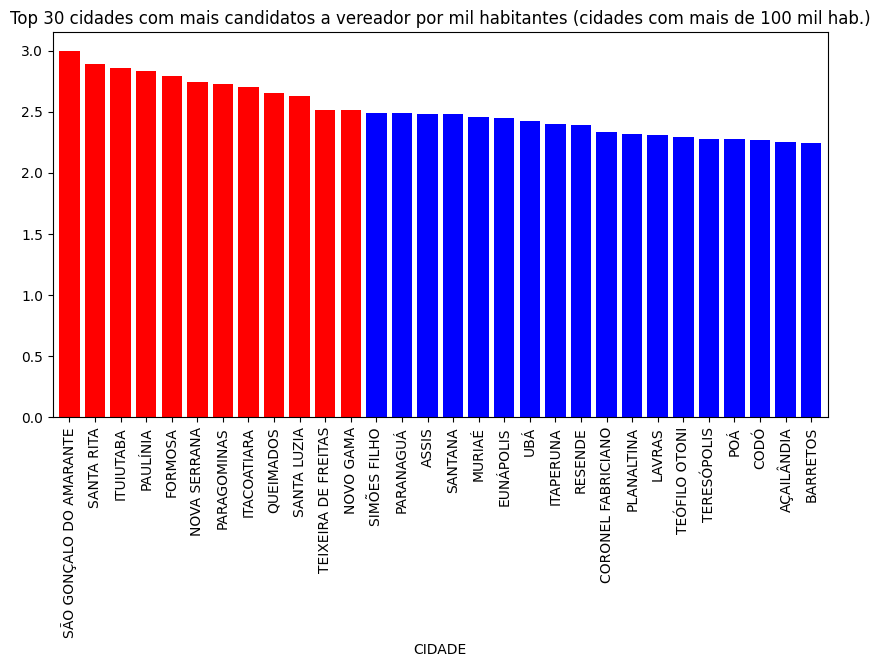

In [10]:
bar_colors = ["red" if x[1]["CAND_POR_MIL_HAB"] > 2.5 else "blue" for x in df_cand_vereador_grandes_cidades[0:30].iterrows()]

ax =df_cand_vereador_grandes_cidades.iloc[0: 30].plot("CIDADE", "CAND_POR_MIL_HAB", kind="bar",\
                    title = "Top 30 cidades com mais candidatos a vereador por mil habitantes (cidades com mais de 100 mil hab.)", 
                    width = 0.8, figsize=(10, 5), color=bar_colors)
ax.legend().remove()
plt.xticks(rotation=90);
plt.show()

Cidades com menos de um candidato a vereador para cada mil habitantes são representados em vermelho no gráfico abaixo.

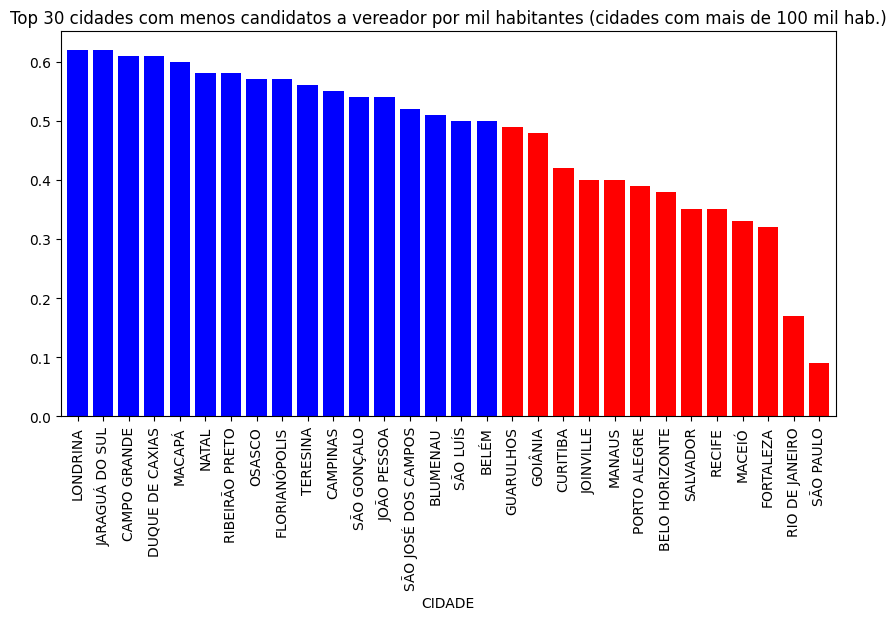

In [11]:
bar_colors = ["red" if x[1]["CAND_POR_MIL_HAB"] < 0.5 else "blue" for x in df_cand_vereador_grandes_cidades[-30:].iterrows()]

ax =df_cand_vereador_grandes_cidades.iloc[-30:].plot("CIDADE", "CAND_POR_MIL_HAB", kind="bar",\
                    title = "Top 30 cidades com menos candidatos a vereador por mil habitantes (cidades com mais de 100 mil hab.)", 
                    width = 0.8, figsize=(10, 5), color=bar_colors)
ax.legend().remove()
plt.xticks(rotation=90);


In [12]:
df_cand_prefeito_vice_grandes_cidades = df[df["DS_CARGO"] != "VEREADOR"].query(f"NM_UE.isin({lista_de_cidades})")\
                                        [["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()\
                                        .rename(columns={"NM_URNA_CANDIDATO" : "NUMERO DE CANDIDATOS"})\
                                        .merge(df_pop_grandes_cidades, left_on="NM_UE", right_on="CIDADE")\
                            .assign(CAND_POR_100MIL_HAB = lambda x : [ round(y["NUMERO DE CANDIDATOS"]/(y["POPULACAO"]/100000), 2) for i, y in x.iterrows()])\
                            .sort_values(by="CAND_POR_100MIL_HAB", ascending=False)\
                            .reset_index(drop=True)
df_cand_prefeito_vice_grandes_cidades

,NUMERO DE CANDIDATOS,CIDADE,POPULACAO,CAND_POR_100MIL_HAB
0,18,PAULÍNIA,110537,16.28
1,21,ARAUCÁRIA,151666,13.85
2,16,ITAGUAÍ,116841,13.69
3,14,ITACOATIARA,103598,13.51
4,16,SARANDI,118455,13.51
...,...,...,...,...
313,18,FORTALEZA,2428708,0.74
314,14,MANAUS,2063689,0.68
315,14,SALVADOR,2417678,0.58
316,18,RIO DE JANEIRO,6211223,0.29


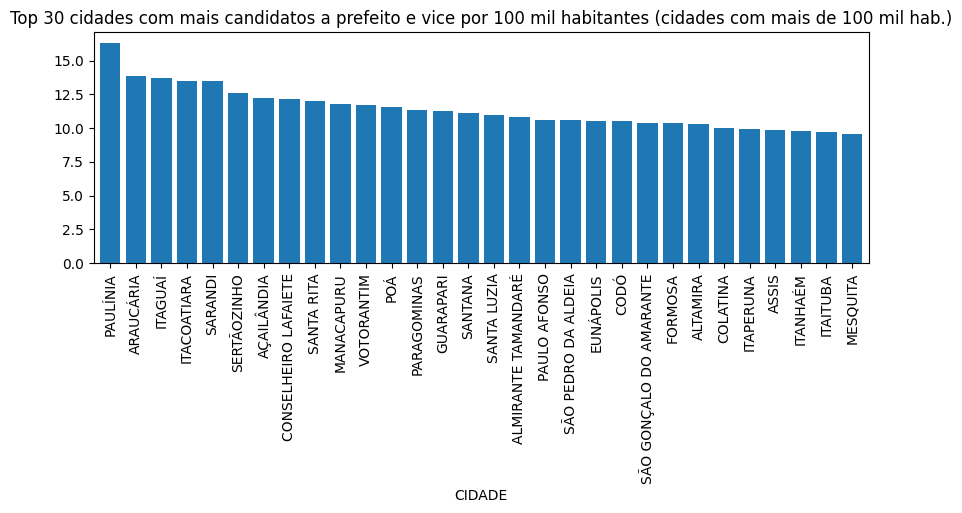

In [13]:
ax = df_cand_prefeito_vice_grandes_cidades[0:30].plot("CIDADE", "CAND_POR_100MIL_HAB", kind="bar", figsize = (10, 3), width=0.8, \
        title ="Top 30 cidades com mais candidatos a prefeito e vice por 100 mil habitantes (cidades com mais de 100 mil hab.)")
ax.legend().remove()
plt.xticks(rotation=90);

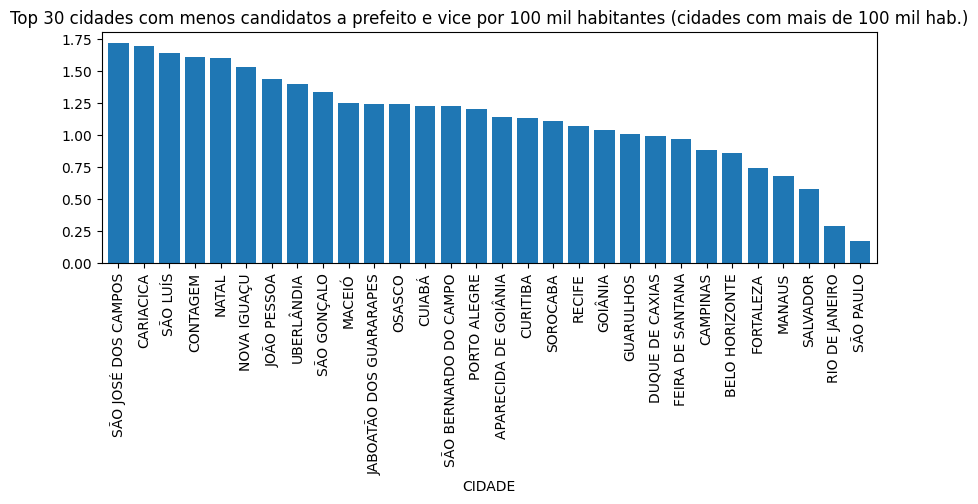

In [14]:
ax = df_cand_prefeito_vice_grandes_cidades[-30:].plot("CIDADE", "CAND_POR_100MIL_HAB", kind="bar", figsize = (10, 3), width=0.8, \
        title ="Top 30 cidades com menos candidatos a prefeito e vice por 100 mil habitantes (cidades com mais de 100 mil hab.)")
ax.legend().remove()
plt.xticks(rotation=90);

In [15]:
print(df.columns)

Index(['SG_UF', 'NM_UE', 'DS_CARGO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO',
       'NM_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO'],
      dtype='object')


In [16]:
df_candidatos_por_partido = df[["NM_URNA_CANDIDATO", "SG_PARTIDO"]].groupby(["SG_PARTIDO"], as_index=False).count()\
                            .sort_values(by="NM_URNA_CANDIDATO", ascending = False).reset_index(drop = True)\
                            .rename(columns={"NM_URNA_CANDIDATO" : "NUMERO DE CANDIDATOS"})
display(df_candidatos_por_partido)

,SG_PARTIDO,NUMERO DE CANDIDATOS
0,MDB,44481
1,PP,39907
2,PSD,38927
3,UNIÃO,36603
4,PL,36034
5,REPUBLICANOS,34026
6,PT,30133
7,PSB,26554
8,PODE,23805
9,PDT,22933


In [17]:
candidatos_partidos_pequenos = pd.DataFrame(df_candidatos_por_partido[df_candidatos_por_partido["NUMERO DE CANDIDATOS"] < 1000].sum())
display(candidatos_partidos_pequenos.T)

,SG_PARTIDO,NUMERO DE CANDIDATOS
0,PCOPSTUUPPCB,486


,SG_PARTIDO,NUMERO DE CANDIDATOS
0,MDB,44481
1,PP,39907
2,PSD,38927
3,UNIÃO,36603
4,PL,36034
5,REPUBLICANOS,34026
6,PT,30133
7,PSB,26554
8,PODE,23805
9,PDT,22933


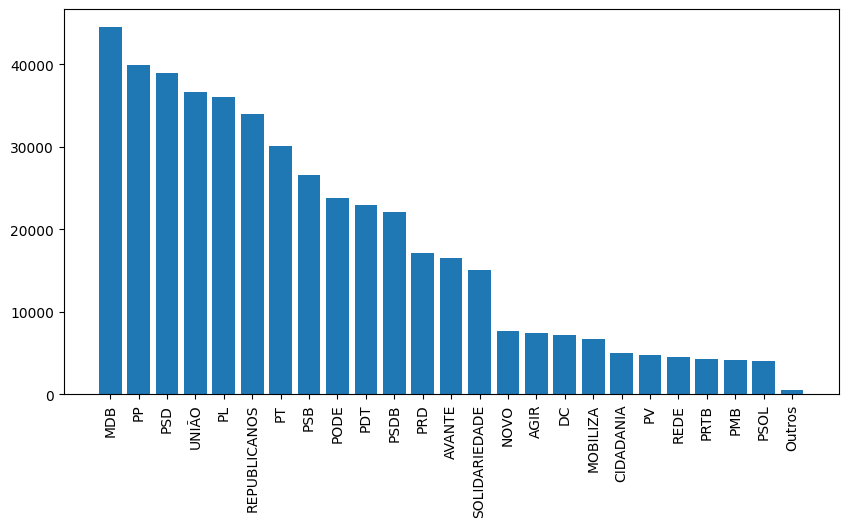

In [18]:
df_candidatos_por_partido = df_candidatos_por_partido[df_candidatos_por_partido["NUMERO DE CANDIDATOS"]>= 1000]
row =  ["Outros",candidatos_partidos_pequenos.T.iloc[0]["NUMERO DE CANDIDATOS"]]
df_candidatos_por_partido.loc[df_candidatos_por_partido.index[-1]] = row
display(df_candidatos_por_partido)
figure = plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(df_candidatos_por_partido["SG_PARTIDO"], df_candidatos_por_partido["NUMERO DE CANDIDATOS"])
plt.show()

In [19]:
df_candidatos_prefeito_por_partido = df[df["DS_CARGO"] == "PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]]\
                             .groupby(["SG_PARTIDO"], as_index=False).count()

df_candidatos_vice_prefeito_por_partido = df[df["DS_CARGO"] == "VICE-PREFEITO"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]]\
                             .groupby(["SG_PARTIDO"], as_index=False).count()

df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo = df[df["DS_CARGO"] == "VEREADOR"][["NM_URNA_CANDIDATO", "SG_PARTIDO"]]\
                             .groupby(["SG_PARTIDO"], as_index=False).count()\
                             .rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"}).rename(columns={"NM_URNA_CANDIDATO": "VEREADOR"})\
                             .merge(df_candidatos_prefeito_por_partido, on="SG_PARTIDO")\
                             .rename(columns={"NM_URNA_CANDIDATO": "PREFEITO"})\
                             .merge(df_candidatos_vice_prefeito_por_partido, on="SG_PARTIDO")\
                             .rename(columns={"NM_URNA_CANDIDATO": "VICE PREFEITO"})

df_cand_por_partido_e_cargo["VEREADOR POR PREFEITO"] = round(df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["PREFEITO"], 1)
df_cand_por_partido_e_cargo["VEREADOR POR VICE PREFEITO"] = round(df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["VICE PREFEITO"], 1)
df_cand_por_partido_e_cargo["PREFEITO POR VICE"] = round(df_cand_por_partido_e_cargo["PREFEITO"]/df_cand_por_partido_e_cargo["VICE PREFEITO"], 1)
df_cand_por_partido_e_cargo["LEGISLATIVO POR EXECUTIVO"] = round(df_cand_por_partido_e_cargo["VEREADOR"]\
                            /(df_cand_por_partido_e_cargo["PREFEITO"] +  df_cand_por_partido_e_cargo["VICE PREFEITO"]), 1)


display(df_cand_por_partido_e_cargo)

,SG_PARTIDO,VEREADOR,PREFEITO,VICE PREFEITO,VEREADOR POR PREFEITO,VEREADOR POR VICE PREFEITO,PREFEITO POR VICE,LEGISLATIVO POR EXECUTIVO
0,AGIR,7127,90,157,79.2,45.4,0.6,28.9
1,AVANTE,15694,390,435,40.2,36.1,0.9,19.0
2,CIDADANIA,4802,111,123,43.3,39.0,0.9,20.5
3,DC,6908,105,159,65.8,43.4,0.7,26.2
4,MDB,40826,1926,1729,21.2,23.6,1.1,11.2
5,MOBILIZA,6298,149,179,42.3,35.2,0.8,19.2
6,NOVO,7067,247,290,28.6,24.4,0.9,13.2
7,PC do B,3020,61,105,49.5,28.8,0.6,18.2
8,PCB,17,9,10,1.9,1.7,0.9,0.9
9,PCO,93,43,43,2.2,2.2,1.0,1.1


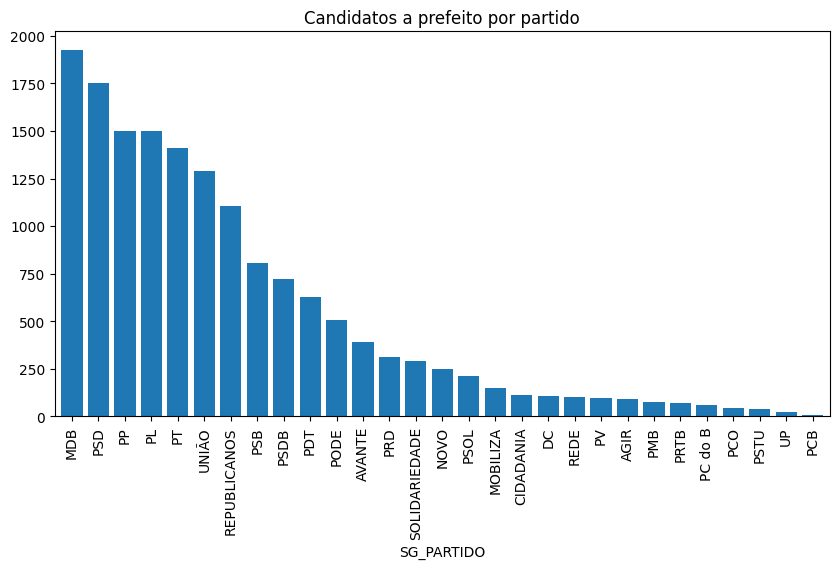

In [20]:
df_cand_por_partido_e_cargo.sort_values(by="PREFEITO", ascending=False).plot("SG_PARTIDO", "PREFEITO", kind="bar",\
                                                                            title = "Candidatos a prefeito por partido", width=0.8, figsize =(10,5))\
                                                                            .legend().remove();
plt.xticks(rotation=90);

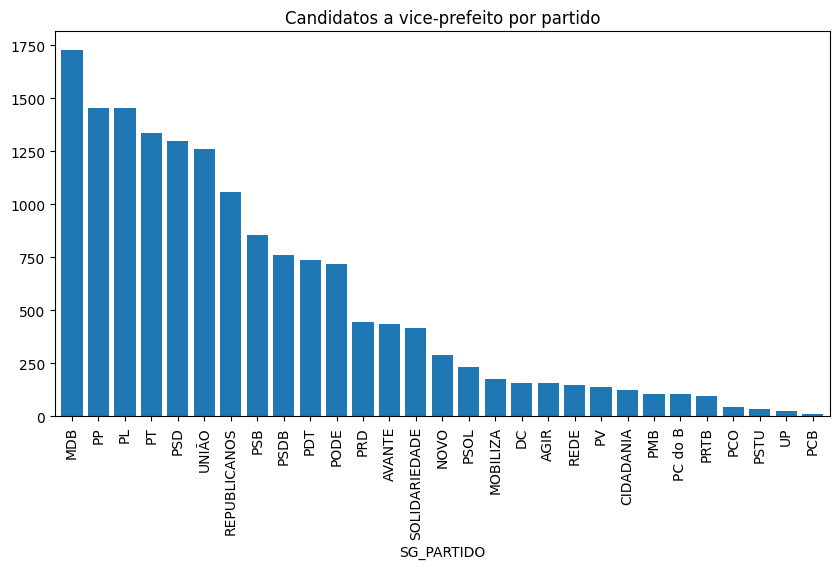

In [21]:
df_cand_por_partido_e_cargo.sort_values(by="VICE PREFEITO", ascending=False).plot("SG_PARTIDO", "VICE PREFEITO", kind="bar",\
                                                                            title = "Candidatos a vice-prefeito por partido", width=0.8, figsize =(10,5))\
                                                                            .legend().remove();
plt.xticks(rotation=90);

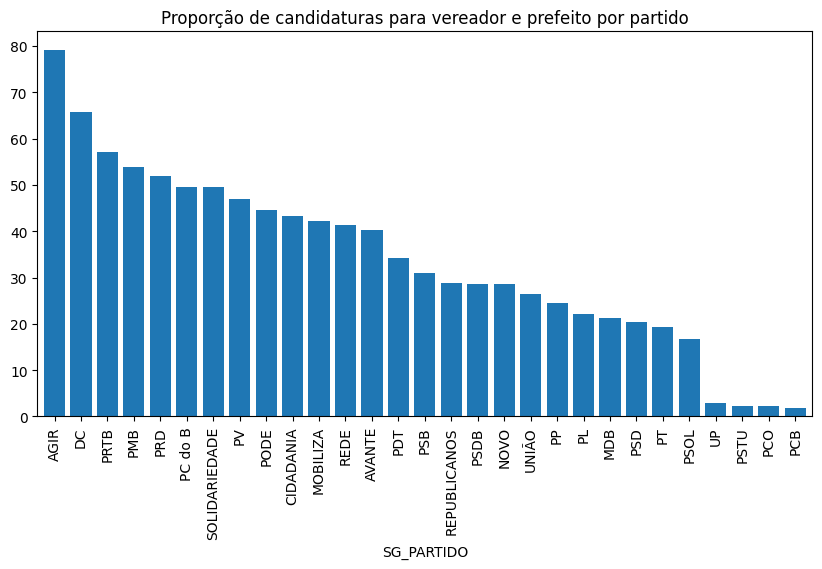

In [22]:
df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR PREFEITO", ascending=False).plot("SG_PARTIDO", "VEREADOR POR PREFEITO", kind="bar",\
                                                                            title = "Proporção de candidaturas para vereador e prefeito por partido", 
                                                                            width=0.8, figsize =(10,5))\
                                                                            .legend().remove();
plt.xticks(rotation=90);


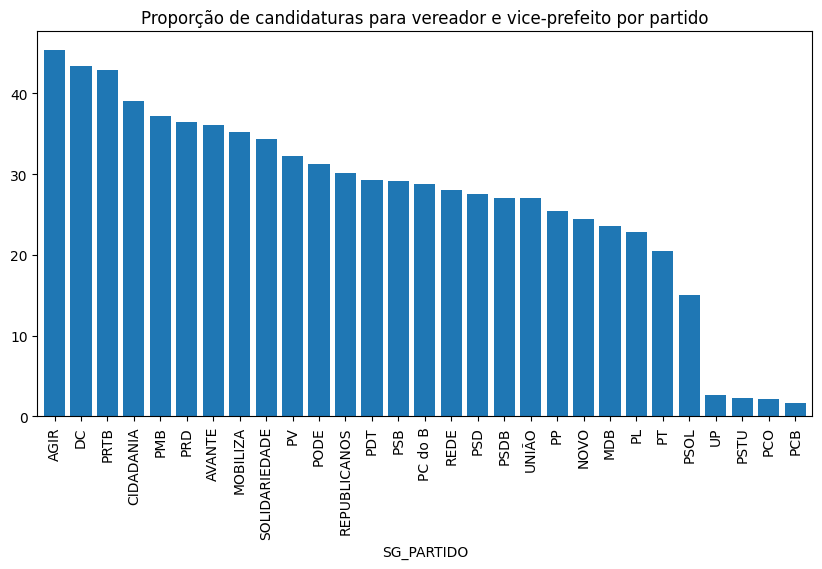

In [23]:
df_cand_por_partido_e_cargo.sort_values(by="VEREADOR POR VICE PREFEITO", ascending=False).plot("SG_PARTIDO", "VEREADOR POR VICE PREFEITO", kind="bar",\
                                                                            title = "Proporção de candidaturas para vereador e vice-prefeito por partido", 
                                                                            width=0.8, figsize =(10,5))\
                                                                            .legend().remove();
plt.xticks(rotation=90);

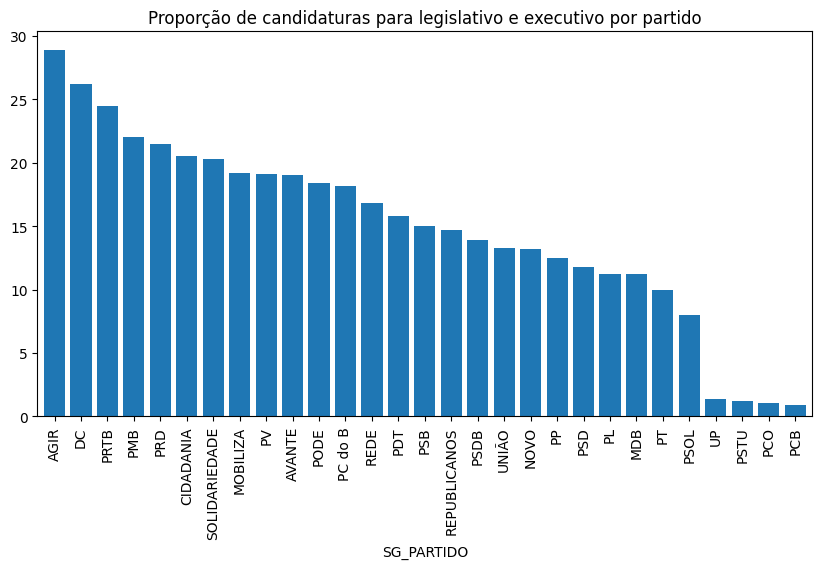

In [24]:
df_cand_por_partido_e_cargo.sort_values(by="LEGISLATIVO POR EXECUTIVO", ascending=False).plot("SG_PARTIDO", "LEGISLATIVO POR EXECUTIVO", kind="bar",\
                                                                            title = "Proporção de candidaturas para legislativo e executivo por partido", 
                                                                            width=0.8, figsize =(10,5))\
                                                                            .legend().remove();
plt.xticks(rotation=90);

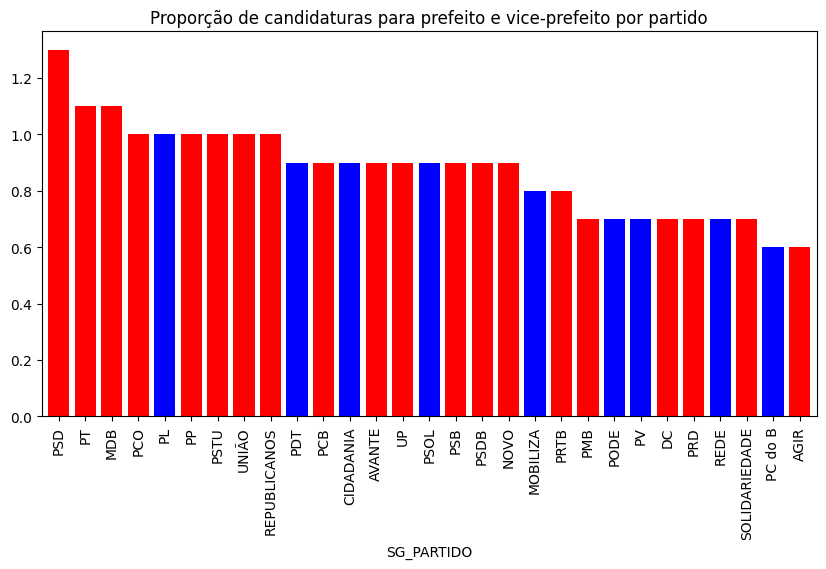

In [25]:
bar_colors = ["red" if x[1]["PREFEITO POR VICE"] < 1 else "blue" for x in df_cand_por_partido_e_cargo.iterrows()]

df_cand_por_partido_e_cargo.sort_values(by="PREFEITO POR VICE", ascending=False).plot("SG_PARTIDO","PREFEITO POR VICE", kind="bar",\
                                                                            title = "Proporção de candidaturas para prefeito e vice-prefeito por partido", 
                                                                            width=0.8, figsize =(10,5), color = bar_colors)\
                                                                            .legend().remove();
plt.xticks(rotation=90);

Partidos em azul, no gráfico acima, tem mais candidatos a prefeito do que a vice

In [26]:
df_bancadas_por_partido = pd.read_csv("bancadas_camara_deputados.csv", sep=";")
df_bancadas_por_partido = df_bancadas_por_partido.sort_values(by="DEPUTADOS", ascending=False).reset_index(drop = True)
display(df_bancadas_por_partido)
print(df_bancadas_por_partido["DEPUTADOS"].sum())

,SG_PARTIDO,DEPUTADOS
0,PL,92
1,PT,68
2,UNIÃO,59
3,PP,50
4,PSD,45
5,REPUBLICANOS,44
6,MDB,44
7,PDT,18
8,PODE,14
9,PSB,14


513


In [27]:
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.merge(df_bancadas_por_partido[["SG_PARTIDO", "DEPUTADOS"]],\
                                                                on="SG_PARTIDO")
display(df_cand_por_partido_e_cargo)

,SG_PARTIDO,VEREADOR,PREFEITO,VICE PREFEITO,VEREADOR POR PREFEITO,VEREADOR POR VICE PREFEITO,PREFEITO POR VICE,LEGISLATIVO POR EXECUTIVO,DEPUTADOS
0,AVANTE,15694,390,435,40.2,36.1,0.9,19.0,7
1,CIDADANIA,4802,111,123,43.3,39.0,0.9,20.5,5
2,MDB,40826,1926,1729,21.2,23.6,1.1,11.2,44
3,NOVO,7067,247,290,28.6,24.4,0.9,13.2,4
4,PDT,21568,629,736,34.3,29.3,0.9,15.8,18
5,PL,33082,1499,1453,22.1,22.8,1.0,11.2,92
6,PODE,22578,506,721,44.6,31.3,0.7,18.4,14
7,PP,36952,1501,1454,24.6,25.4,1.0,12.5,50
8,PRD,16333,314,447,52.0,36.5,0.7,21.5,5
9,PSB,24894,806,854,30.9,29.1,0.9,15.0,14


Partidos com menos de 1000 candidatos a vereador por deputado na Câmara são representados em azul no grafico abaixo.

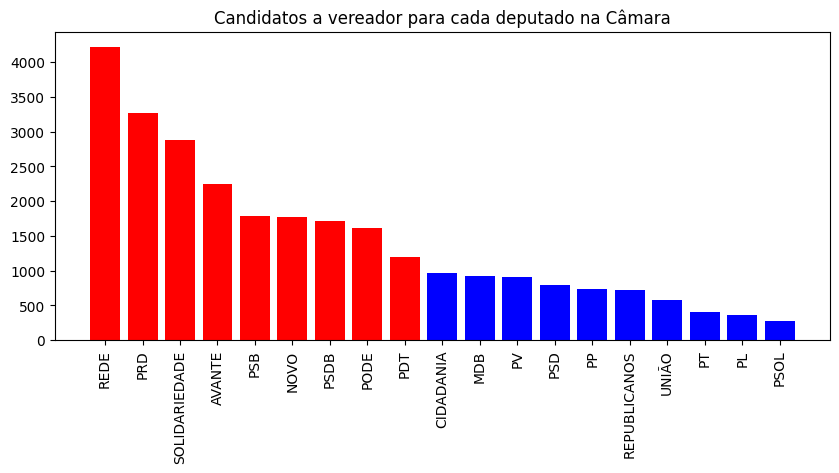

In [28]:
df_cand_por_partido_e_cargo["CAND. VEREADOR POR DEPUTADO"] = df_cand_por_partido_e_cargo["VEREADOR"]/df_cand_por_partido_e_cargo["DEPUTADOS"]
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="CAND. VEREADOR POR DEPUTADO", ascending=False) 
bar_colors = ["blue" if x[1]["CAND. VEREADOR POR DEPUTADO"] < 1000 else "red" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize = (10, 4))
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["CAND. VEREADOR POR DEPUTADO"], color=bar_colors)
plt.xticks(rotation=90)
plt.title("Candidatos a vereador para cada deputado na Câmara")
plt.show()

Partidos com menos de 30 candidatos a prefeito por deputado n Câmara são representados em azul no gráfico abaixo

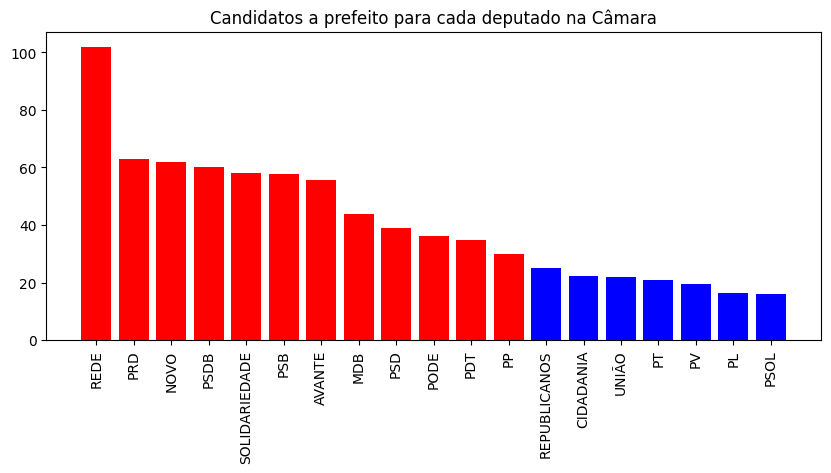

In [29]:
df_cand_por_partido_e_cargo["CAND. PREFEITO POR DEPUTADO"] = df_cand_por_partido_e_cargo["PREFEITO"]/df_cand_por_partido_e_cargo["DEPUTADOS"]
df_cand_por_partido_e_cargo = df_cand_por_partido_e_cargo.sort_values(by="CAND. PREFEITO POR DEPUTADO", ascending=False) 
bar_colors = ["blue" if x[1]["CAND. PREFEITO POR DEPUTADO"] <= 30 else "red" for x in df_cand_por_partido_e_cargo.iterrows()]
figure = plt.figure(figsize = (10, 4))
plt.bar(df_cand_por_partido_e_cargo["SG_PARTIDO"], df_cand_por_partido_e_cargo["CAND. PREFEITO POR DEPUTADO"], color=bar_colors)
plt.xticks(rotation=90)
plt.title("Candidatos a prefeito para cada deputado na Câmara")
plt.show()

In [30]:
df_cand_vereador_por_uf_e_partido = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO", "SG_PARTIDO"]]\
                                    .groupby(["SG_UF"]).apply(lambda x : x.groupby("SG_PARTIDO").count()
                                    .sort_values(by="NM_URNA_CANDIDATO", ascending=False).head(5), include_groups = False)
display(df_cand_vereador_por_uf_e_partido)


NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AC    PP                          250
      UNIÃO                       232
      REPUBLICANOS                225
      PL                          224
      MDB                         199
...                               ...
TO    REPUBLICANOS               1062
      UNIÃO                       965
      PDT                         675
      PP                          661
      MDB                         529

[130 rows x 1 columns]

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                   
PR    PSD                      3518
      PP                       2986
      PL                       2898
      MDB                      2829
      UNIÃO                    2725
RS    PP                       4143
      MDB                      3918
      PDT                      2932
      PL                       2599
      PT                       2457
SC    MDB                      2761
      PL                       2607
      PP                       2135
      PSD                      2059
      PT                       1418

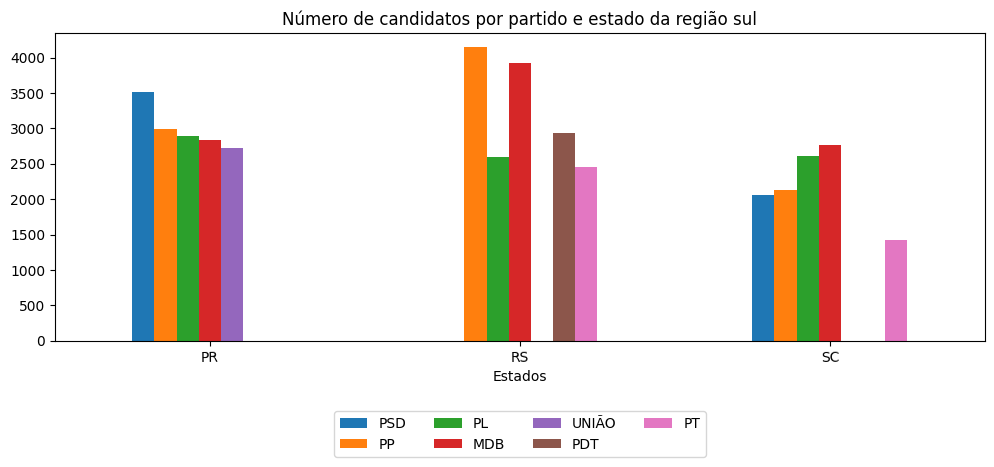

In [31]:
estados_sul = ["RS", "SC", "PR"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_sul)
df_cand_vereador_sul_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_sul_por_uf_e_partido)

df_cand_vereador_sul_por_uf_e_partido.unstack()["NM_URNA_CANDIDATO"]\
                .plot(kind="bar", rot=True, title="Número de candidatos por partido e estado da região sul", xlabel = "Estados", figsize= (12, 4))\
                .legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4));

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                      
ES    PSB                          850
      PODE                         848
      PP                           817
      PL                           720
      MDB                          696
MG    PSD                         5806
      MDB                         5337
      PL                          4925
      REPUBLICANOS                4910
      PP                          4758
RJ    PL                          1204
      UNIÃO                       1158
      SOLIDARIEDADE               1136
      REPUBLICANOS                1126
      PP                          1067
SP    PSD                         6498
      REPUBLICANOS                6342
      PL                          6301
      MDB                         5844
      UNIÃO                       5435

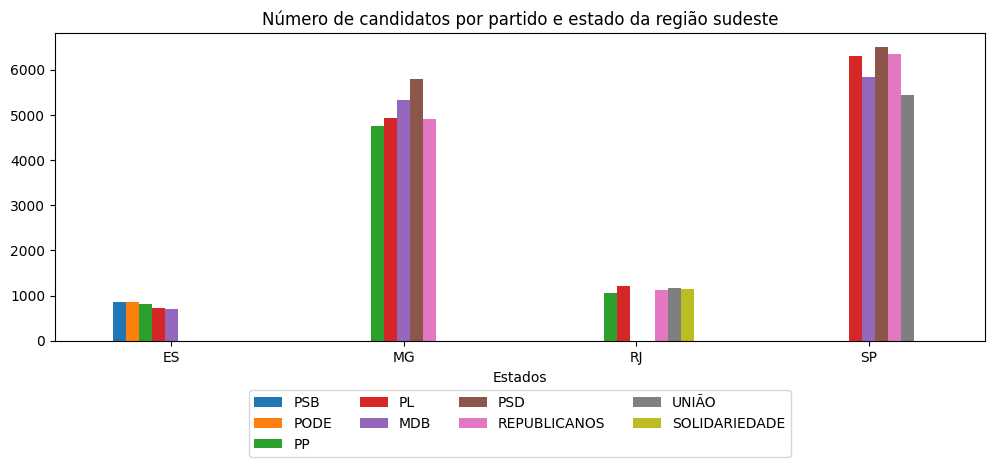

In [32]:
estados_sudeste = ["ES", "MG", "RJ", "SP"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_sudeste)
df_cand_vereador_sudeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_sudeste_por_uf_e_partido)

df_cand_vereador_sudeste_por_uf_e_partido.unstack()["NM_URNA_CANDIDATO"]\
                .plot(kind="bar", rot=True, title="Número de candidatos por partido e estado da região sudeste", xlabel = "Estados", figsize= (12, 4))\
                .legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4));


NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
GO    UNIÃO                      2145
      MDB                        2116
      PP                         1625
      PL                         1593
      PDT                        1084
MS    PSDB                        865
      PP                          790
      PL                          633
      MDB                         621
      REPUBLICANOS                607
MT    UNIÃO                      1334
      PL                         1167
      MDB                        1085
      REPUBLICANOS               1024
      PSB                         940

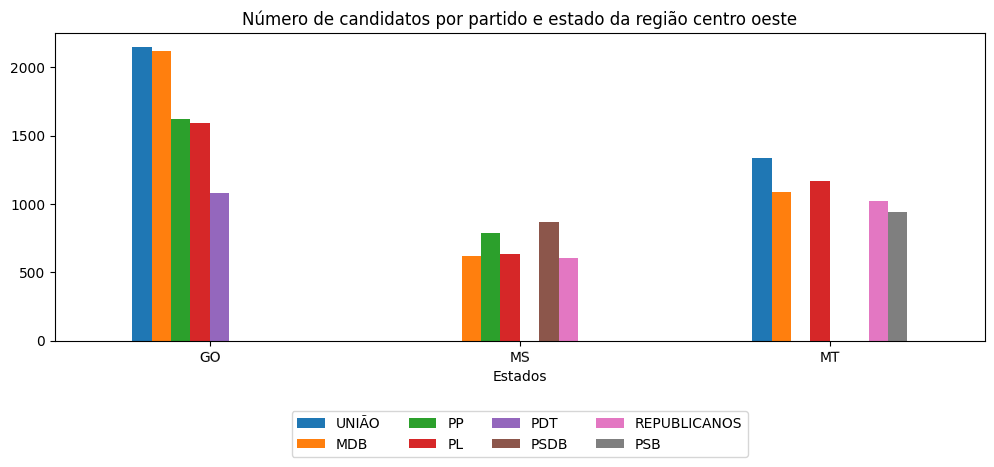

In [33]:
estados_centro_oeste = ["GO", "MT", "MS"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_centro_oeste)
df_cand_vereador_centro_oeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_centro_oeste_por_uf_e_partido)

df_cand_vereador_centro_oeste_por_uf_e_partido.unstack()["NM_URNA_CANDIDATO"]\
                .plot(kind="bar", rot=True, title="Número de candidatos por partido e estado da região centro oeste", xlabel = "Estados", figsize= (12, 4))\
                .legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4));

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AL    MDB                         990
      PP                          849
      PSB                         823
      UNIÃO                       410
      PDT                         361
BA    PSD                        3999
      AVANTE                     2820
      PT                         2654
      MDB                        2496
      PP                         2450
CE    PSB                        1563
      PT                         1517
      PSD                        1068
      MDB                         989
      UNIÃO                       880
MA    UNIÃO                      1389
      MDB                        1354
      PSB                        1307
      PP                         1258
      PL                         1222
PB    REPUBLICANOS               1460
      PSB                        1254
      MDB                        1029
      UNIÃO                       786
      PP                          775
PE    PSB                        1472
      REPUBLICANOS               1330
      PP                         1223
      PSD                        1157
      PSDB                       1140
PI    PT                         1668
      MDB                        1531
      PSD                        1430
      PP                          856
      REPUBLICANOS                402
RN    MDB                        1046
      UNIÃO                       832
      PP                          778
      PSDB                        651
      PL                          636
SE    PSD                         756
      UNIÃO                       672
      PP                          529
      PT                          391
      MDB                         341

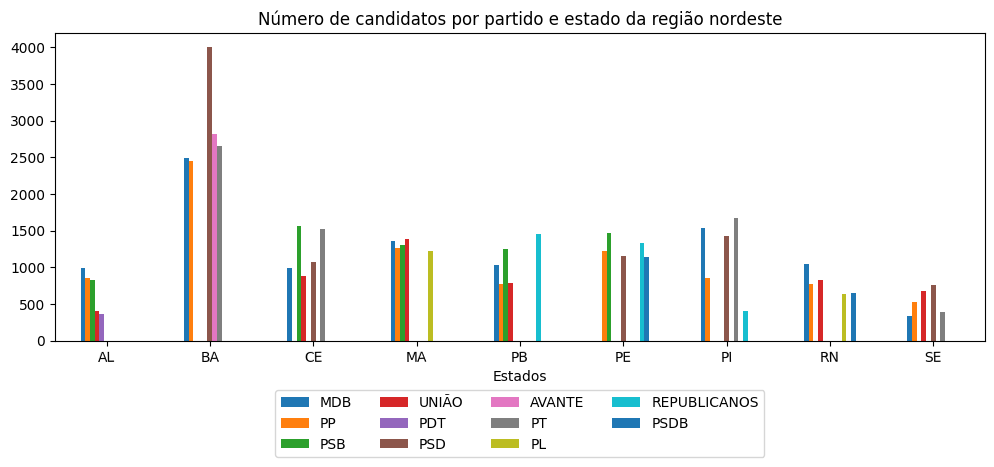

In [34]:
estados_nordeste = ["BA", "SE", "AL", "PB", "PE", "RN", "CE", "MA", "PI"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_nordeste)
df_cand_vereador_nordeste_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_nordeste_por_uf_e_partido)

df_cand_vereador_nordeste_por_uf_e_partido.unstack()["NM_URNA_CANDIDATO"]\
                .plot(kind="bar", rot=True, title="Número de candidatos por partido e estado da região nordeste", xlabel = "Estados", figsize= (12, 4))\
                .legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4));

NM_URNA_CANDIDATO
SG_UF SG_PARTIDO                     
AC    PP                          250
      UNIÃO                       232
      REPUBLICANOS                225
      PL                          224
      MDB                         199
AM    REPUBLICANOS                738
      UNIÃO                       727
      PSD                         710
      MDB                         700
      PP                          530
AP    PDT                         165
      PL                          159
      UNIÃO                       158
      PSD                         144
      MDB                         124
PA    MDB                        1785
      UNIÃO                      1651
      PSD                        1465
      PP                         1278
      PT                         1202
RO    UNIÃO                       530
      PL                          482
      PSD                         432
      MDB                         420
      PP                          386
RR    REPUBLICANOS                161
      PP                          157
      PDT                         154
      PODE                        117
      PSD                         102
TO    REPUBLICANOS               1062
      UNIÃO                       965
      PDT                         675
      PP                          661
      MDB                         529

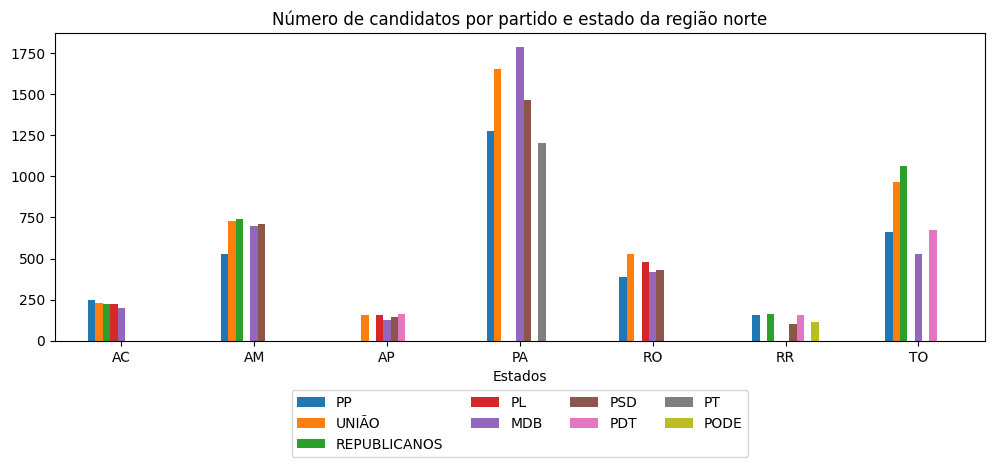

In [35]:
estados_norte = ["TO", "AM", "AP", "RO", "RR", "AC", "PA"]
selected_rows = df_cand_vereador_por_uf_e_partido.index.get_level_values(0).isin(estados_norte)
df_cand_vereador_norte_por_uf_e_partido = df_cand_vereador_por_uf_e_partido[selected_rows]
display(df_cand_vereador_norte_por_uf_e_partido)

df_cand_vereador_norte_por_uf_e_partido.unstack()["NM_URNA_CANDIDATO"]\
                .plot(kind="bar", rot=True, title="Número de candidatos por partido e estado da região norte", xlabel = "Estados", figsize= (12, 4))\
                .legend(loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.4));

In [36]:
df_politicos_dados_pessoais = pd.read_csv("candidatos_info_pessoal.csv", sep=';')

In [37]:
df_politicos_dados_pessoais.rename(columns= {
    'SG_UF': 'UF',
    'NM_UE': 'CIDADE',
    'DS_CARGO': 'CARGO',
    'NM_URNA_CANDIDATO': 'CANDIDATO',
    'SG_UF_NASCIMENTO': 'UF_NASCIMENTO',
    'DS_GENERO': 'GENERO',
    'DS_GRAU_INSTRUCAO': 'INSTRUCAO',
    'DS_ESTADO_CIVIL': 'ESTADO_CIVIL',
    'DS_COR_RACA': 'RACA',
    'DS_OCUPACAO': 'OCUPACAO'
}, inplace = True)
display(df_politicos_dados_pessoais)

,UF,CIDADE,CARGO,CANDIDATO,UF_NASCIMENTO,DT_NASCIMENTO,GENERO,INSTRUCAO,ESTADO_CIVIL,RACA,OCUPACAO
0,GO,MORRINHOS,VEREADOR,PAULINHO DO HELENÊS,GO,09/03/1962,M,SUPERIOR INCOMPLETO,SOLTEIRO(A),PARDA,OUTROS
1,PE,ESCADA,PREFEITO,KLAUS LIMA,PE,20/06/1988,M,SUPERIOR COMPLETO,CASADO(A),PRETA,ADVOGADO
2,CE,CAUCAIA,VEREADOR,CARECA UNIDOS SOMOS FORTES,CE,26/02/1964,M,MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS
3,MG,DORES DO INDAIÁ,VEREADOR,EDMILSINHO IMPORTS,MG,11/07/2002,M,MÉDIO COMPLETO,SOLTEIRO(A),PARDA,EMPRESÁRIO
4,PR,SÃO PEDRO DO IVAÍ,VEREADOR,MAURILIO ELETRICISTA,PR,30/04/1975,M,FUNDAMENTAL COMPLETO,CASADO(A),PARDA,ELETRICISTA E ASSEMELHADOS
...,...,...,...,...,...,...,...,...,...,...,...
463382,RJ,VARRE-SAI,VEREADOR,OTÁVIO SANTOS,RJ,13/08/1954,M,MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL
463383,MG,MANGA,VEREADOR,DIVANI ALVES,MG,04/03/1990,F,FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,OUTROS
463384,SP,GUARAÇAÍ,VEREADOR,MATEUS PATATI,SP,27/10/2001,M,MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS
463385,SC,MORRO DA FUMAÇA,VEREADOR,DENA GISLON,SC,20/01/1966,F,FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,COMERCIÁRIO


CANDIDATOS COM GÊNERO NÃO DIVULGÁVEL: 44
CANDIDATOS SEM RAÇA INFORMADA OU COM RAÇA NÃO DIVULGÁVEL: 2807


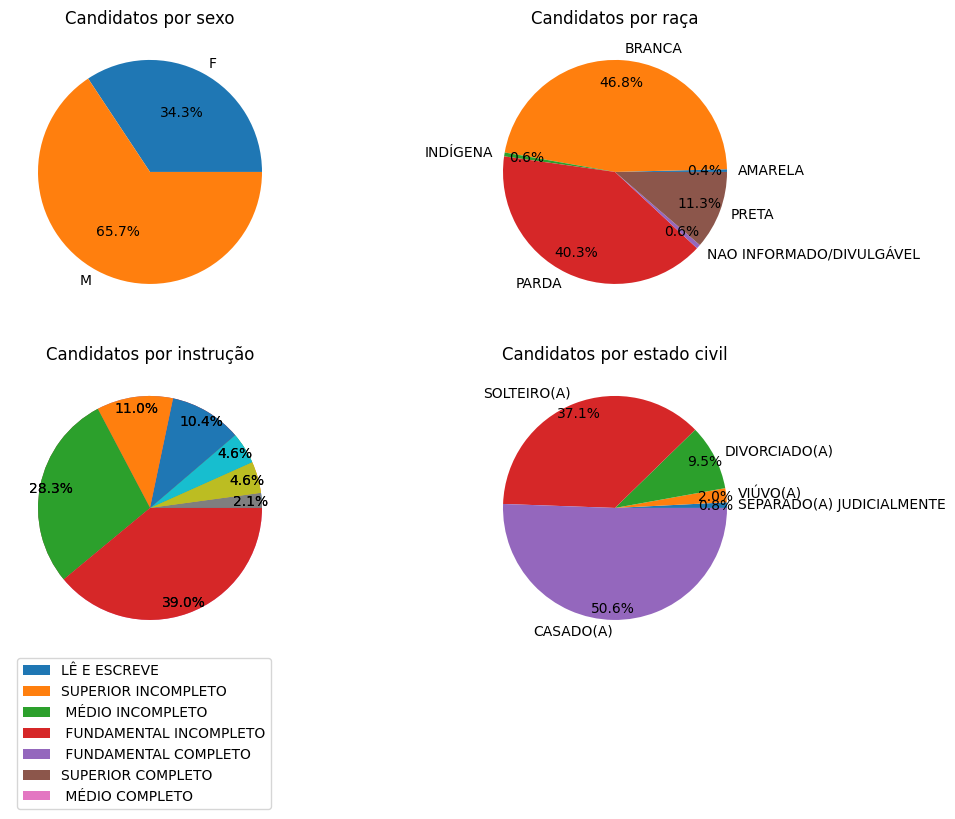

In [38]:
print('CANDIDATOS COM GÊNERO NÃO DIVULGÁVEL:', len(df_politicos_dados_pessoais[df_politicos_dados_pessoais['GENERO'] == 'NÃO DIVULGÁVEL']))
fig, ax = plt.subplots(2, 2, figsize=(11, 8))

df_genero = df_politicos_dados_pessoais[df_politicos_dados_pessoais.GENERO != 'NÃO DIVULGÁVEL'][['CANDIDATO','GENERO']]\
                            .groupby(by='GENERO').count()
ax[0, 0].pie(df_genero['CANDIDATO'], labels = df_genero.index, autopct='%1.1f%%')
ax[0, 0].set(title = 'Candidatos por sexo');

sem_raca = len(df_politicos_dados_pessoais[(df_politicos_dados_pessoais.RACA == 'NÃO DIVULGÁVEL') |\
               (df_politicos_dados_pessoais.RACA == 'NÃO INFORMADO')])

print('CANDIDATOS SEM RAÇA INFORMADA OU COM RAÇA NÃO DIVULGÁVEL:', sem_raca) 

df_raca = df_politicos_dados_pessoais[(df_politicos_dados_pessoais.RACA != 'NÃO DIVULGÁVEL') & (df_politicos_dados_pessoais.RACA != 'NÃO INFORMADO')]\
                             [['CANDIDATO','RACA']].groupby(by='RACA').count()
df_raca.loc['NAO INFORMADO/DIVULGÁVEL'] = sem_raca
df_raca['ORDEM'] = [1, 2, 3, 4, 6, 5] # PARA REORDENAR AS FATIAS DA PIZZA
df_raca = df_raca.sort_values(by='ORDEM')
ax[0, 1].pie(df_raca['CANDIDATO'], labels = df_raca.index, autopct='%1.1f%%', pctdistance = 0.8, labeldistance = 1.1)
ax[0, 1].set(title = 'Candidatos por raça');


df_instrucao = df_politicos_dados_pessoais[(df_politicos_dados_pessoais.INSTRUCAO != 'NÃO DIVULGÁVEL')\
                                            & (df_politicos_dados_pessoais.INSTRUCAO != 'NÃO INFORMADO')\
                                            & (df_politicos_dados_pessoais.INSTRUCAO != 'ANALFABETO')]\
                             [['CANDIDATO','INSTRUCAO']].groupby(by='INSTRUCAO').count().sort_values(by = 'CANDIDATO')
ax[1, 0].pie(df_instrucao['CANDIDATO'], autopct='%1.1f%%', pctdistance = 0.9)
ax[1, 0].legend(loc = 3, labels = df_instrucao.index, bbox_to_anchor=(0.0, -0.6))
ax[1, 0].set(title = 'Candidatos por instrução');


df_instrucao = df_politicos_dados_pessoais[(df_politicos_dados_pessoais.INSTRUCAO != 'NÃO DIVULGÁVEL')\
                                            & (df_politicos_dados_pessoais.INSTRUCAO != 'NÃO INFORMADO')\
                                            & (df_politicos_dados_pessoais.INSTRUCAO != 'ANALFABETO')]\
                             [['CANDIDATO','INSTRUCAO']].groupby(by='INSTRUCAO').count().sort_values(by = 'CANDIDATO')
ax[1, 0].pie(df_instrucao['CANDIDATO'], autopct='%1.1f%%', pctdistance = 0.9)
ax[1, 0].legend(loc = 3, labels = df_instrucao.index, bbox_to_anchor=(0.0, -0.6))
ax[1, 0].set(title = 'Candidatos por instrução');

df_estado_civil = df_politicos_dados_pessoais[(df_politicos_dados_pessoais.ESTADO_CIVIL != 'NÃO DIVULGÁVEL')\
                                            & (df_politicos_dados_pessoais.ESTADO_CIVIL != 'NÃO INFORMADO')]\
                             [['CANDIDATO','ESTADO_CIVIL']].groupby(by='ESTADO_CIVIL').count().sort_values(by = 'CANDIDATO')
ax[1, 1].pie(df_estado_civil['CANDIDATO'], autopct='%1.1f%%', labels = df_estado_civil.index, pctdistance = 0.9, labeldistance = 1.1)
ax[1, 1].set(title = 'Candidatos por estado civil');

In [39]:
df_raca['CATEGORIA'] = 'Raça'
df_genero['CATEGORIA'] = 'Genero'
df_instrucao['CATEGORIA'] = 'Instrução'
df_estado_civil['CATEGORIA'] = 'Estado civil'
display(pd.concat([df_raca.drop(columns='ORDEM'), df_genero, df_instrucao, df_estado_civil]).reset_index().rename(columns={'index': 'GRUPO'})\
        .groupby(by=['CATEGORIA','GRUPO']).last())

CANDIDATO
CATEGORIA    GRUPO                               
Estado civil CASADO(A)                     234293
             DIVORCIADO(A)                  43876
             SEPARADO(A) JUDICIALMENTE       3701
             SOLTEIRO(A)                   172042
             VIÚVO(A)                        9430
Genero       F                             159003
             M                             304339
Instrução     FUNDAMENTAL COMPLETO          51084
              FUNDAMENTAL INCOMPLETO        48373
              MÉDIO COMPLETO               180657
              MÉDIO INCOMPLETO              21121
             LÊ E ESCREVE                    9928
             SUPERIOR COMPLETO             131057
             SUPERIOR INCOMPLETO            21109
Raça         AMARELA                         1791
             BRANCA                        217018
             INDÍGENA                        2578
             NAO INFORMADO/DIVULGÁVEL        2807
             PARDA                         186739
             PRETA                          52453

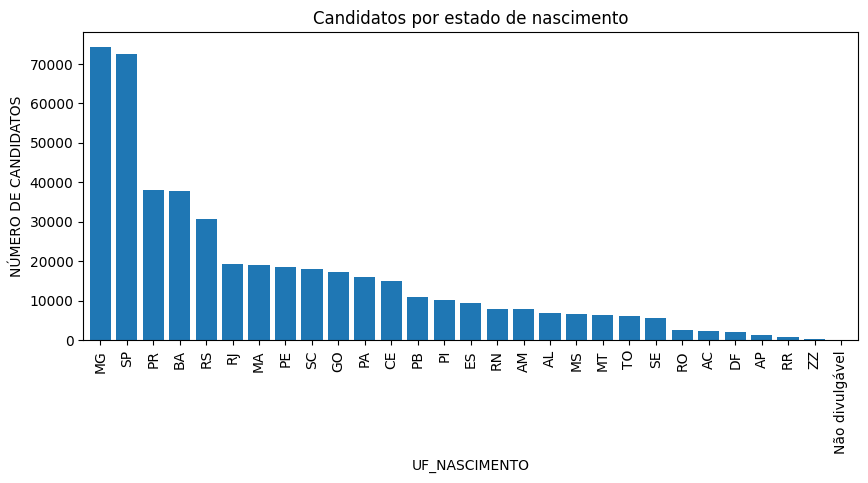

In [40]:
df_politicos_dados_pessoais[['UF_NASCIMENTO', 'CANDIDATO']].groupby(by='UF_NASCIMENTO').count()\
                                                           .sort_values(by='CANDIDATO', ascending = False)\
                                                           .plot(kind='bar', ylabel = 'NÚMERO DE CANDIDATOS', figsize=(10,4), width = 0.8,\
                                                                title = "Candidatos por estado de nascimento")\
                                                           .legend().remove();

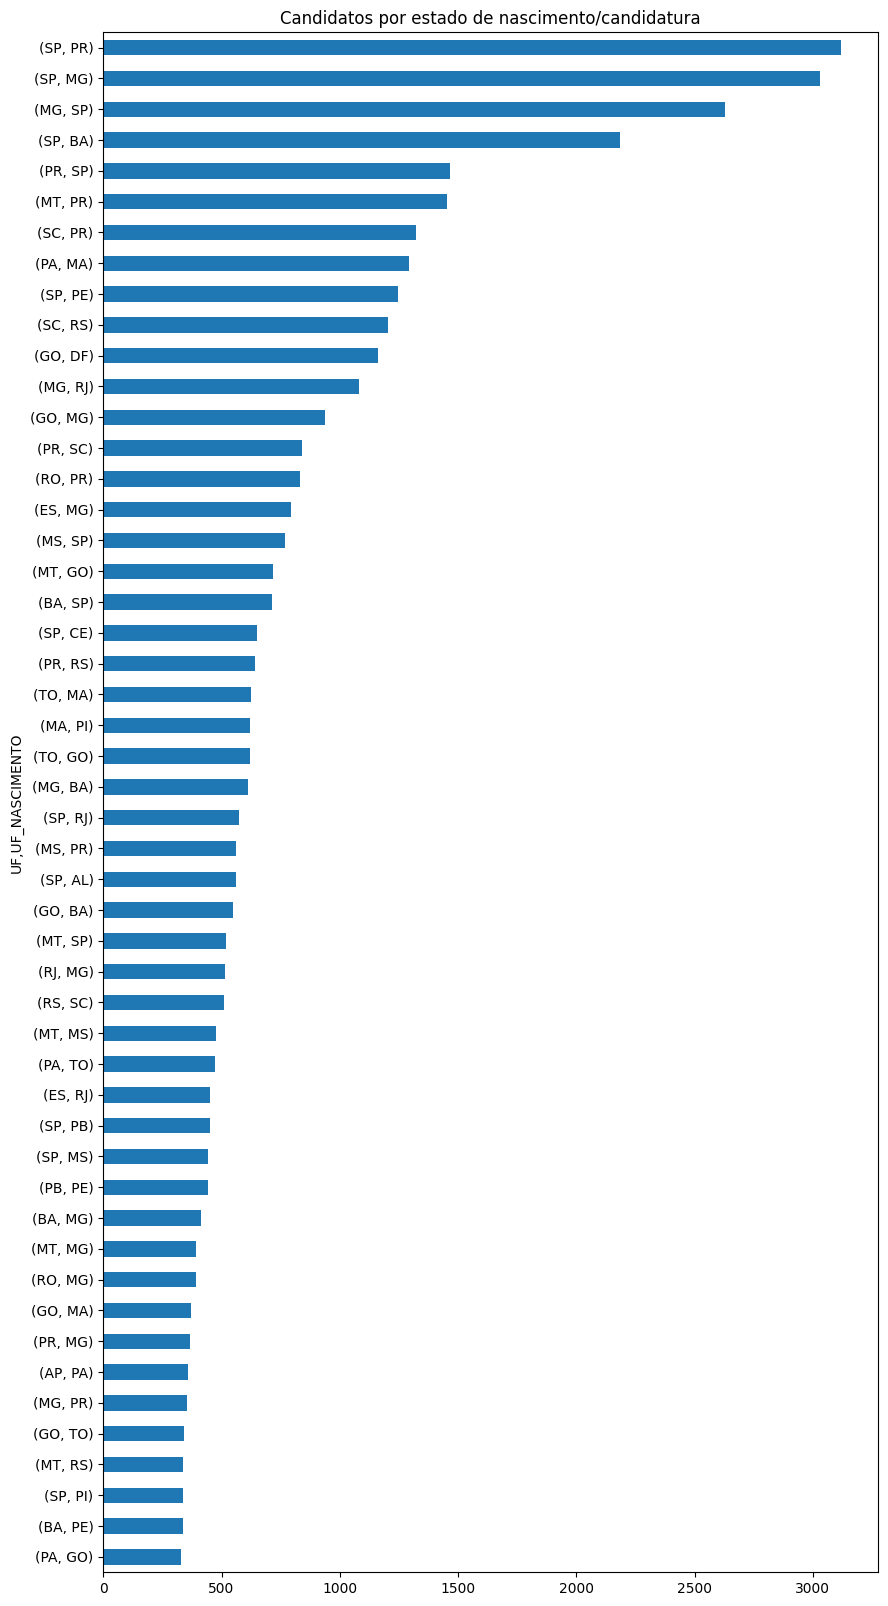

In [41]:
grouped_by_uf = df_politicos_dados_pessoais[df_politicos_dados_pessoais['UF_NASCIMENTO'] != df_politicos_dados_pessoais['UF']]\
                           [['UF', 'UF_NASCIMENTO', 'CANDIDATO']].groupby(by=['UF', 'UF_NASCIMENTO'])

grouped_by_uf.count().sort_values(by='CANDIDATO').tail(50)\
                            .plot(kind='barh', figsize = (10, 20), title="Candidatos por estado de nascimento/candidatura").legend().remove();

In [101]:
size = 0.3
out_circle_data = df_politicos_dados_pessoais[df_politicos_dados_pessoais['UF_NASCIMENTO'] != df_politicos_dados_pessoais['UF']]
out_circle_data = out_circle_data[['UF', 'UF_NASCIMENTO', 'CANDIDATO']].groupby(['UF_NASCIMENTO', 'UF'], sort=False).count()\
                                                                       .unstack().droplevel(0, axis=1).fillna(0)

out_circle_data.loc['TOTAL'] = out_circle_data[:].sum()
display(out_circle_data)

UF,BA,MS,SE,PE,PA,PR,MA,MT,PB,AM,...,RR,PI,ES,SC,AP,TO,CE,RN,AL,AC
UF_NASCIMENTO,,,,,,,,,,,,,,,,,,,,,
DF,97.0,5.0,4.0,11.0,37.0,15.0,38.0,41.0,16.0,4.0,...,4.0,57.0,12.0,13.0,3.0,70.0,31.0,15.0,6.0,1.0
PR,61.0,562.0,7.0,13.0,148.0,0.0,18.0,1452.0,6.0,34.0,...,12.0,8.0,20.0,1323.0,1.0,46.0,16.0,8.0,3.0,27.0
BA,0.0,66.0,211.0,168.0,221.0,132.0,46.0,156.0,21.0,24.0,...,10.0,52.0,311.0,51.0,5.0,66.0,35.0,15.0,67.0,5.0
AL,78.0,37.0,192.0,169.0,27.0,61.0,18.0,91.0,14.0,4.0,...,0.0,6.0,18.0,11.0,1.0,16.0,14.0,11.0,0.0,1.0
SC,8.0,50.0,2.0,1.0,32.0,841.0,2.0,217.0,1.0,8.0,...,4.0,3.0,2.0,0.0,0.0,3.0,3.0,1.0,2.0,2.0
PA,24.0,13.0,3.0,9.0,0.0,34.0,250.0,93.0,3.0,249.0,...,94.0,20.0,10.0,55.0,359.0,194.0,39.0,9.0,2.0,5.0
GO,63.0,56.0,1.0,5.0,329.0,20.0,32.0,718.0,9.0,12.0,...,5.0,11.0,8.0,13.0,3.0,621.0,8.0,7.0,3.0,3.0
PE,337.0,64.0,56.0,0.0,61.0,102.0,75.0,74.0,443.0,11.0,...,7.0,81.0,17.0,27.0,6.0,46.0,88.0,58.0,253.0,1.0
RS,30.0,130.0,3.0,2.0,45.0,643.0,7.0,338.0,3.0,17.0,...,9.0,2.0,4.0,1205.0,1.0,32.0,7.0,6.0,1.0,3.0


In [102]:
def generate_candidature_state_origin_state_nested_pie_chart(estados):
    fig, ax = plt.subplots(figsize=(12, 12))
    num_rows = 5
    
    summarized = {}
    labels = []
    values = []
    for estado in estados:
        summarized[estado] = out_circle_data.iloc[:-1][estado].sort_values(ascending = False)
        summarized[estado] = pd.concat([summarized[estado][:num_rows], pd.Series({'Outros': sum(summarized[estado][num_rows:])})])
        labels = labels + list(itertools.product(*[[estado], summarized[estado].index]))
        values = values + list(summarized[estado].values)
    
    labels = [x[1] for x in labels]
    ax.pie(out_circle_data.loc['TOTAL',estados], labels = estados, radius= 1, labeldistance=1, wedgeprops=dict(width=0.25, edgecolor='w'));
    ax.pie(values, labels = labels, radius= 0.75, labeldistance=1.1, wedgeprops=dict(width=0.25, edgecolor='w'));

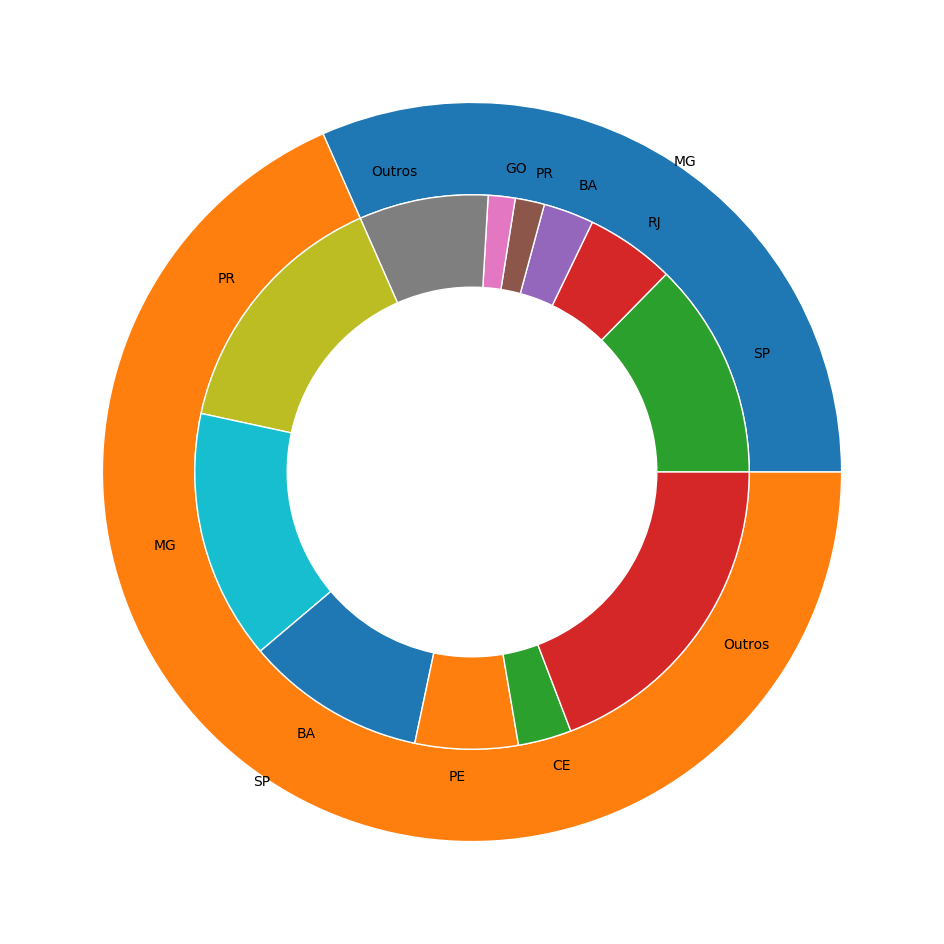

In [103]:
generate_candidature_state_origin_state_nested_pie_chart(['MG', 'SP'])

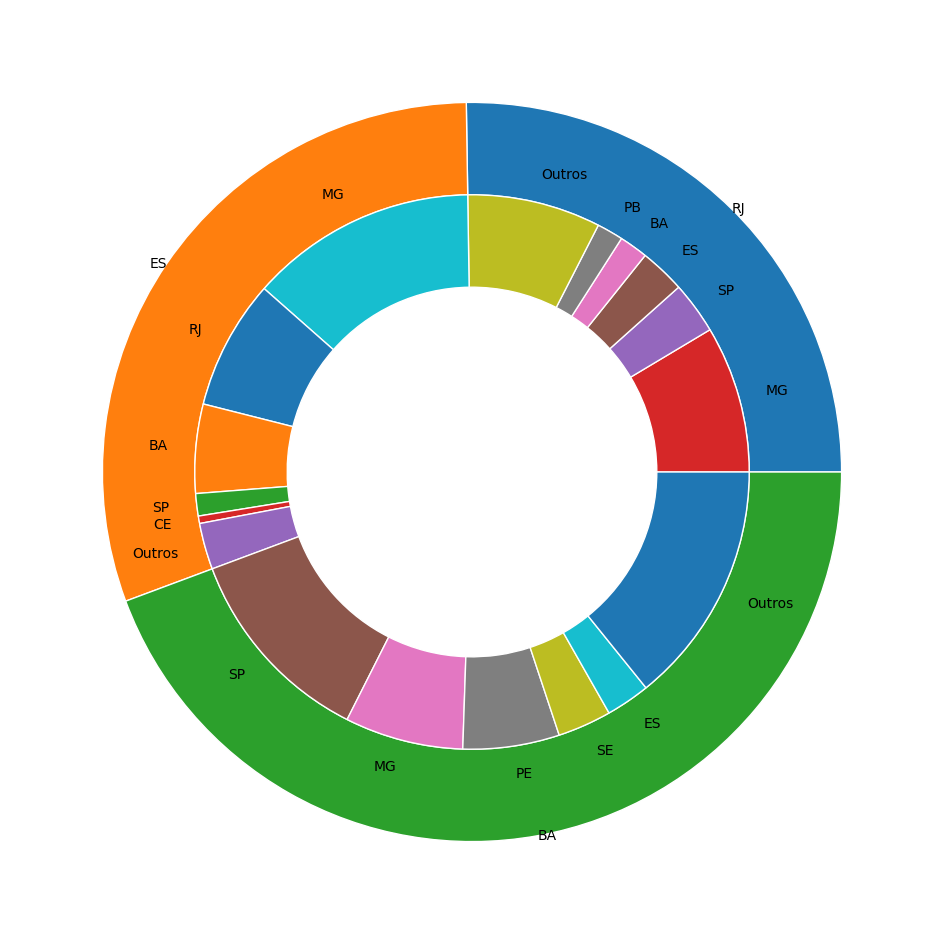

In [104]:
generate_candidature_state_origin_state_nested_pie_chart(['RJ', 'ES', 'BA'])

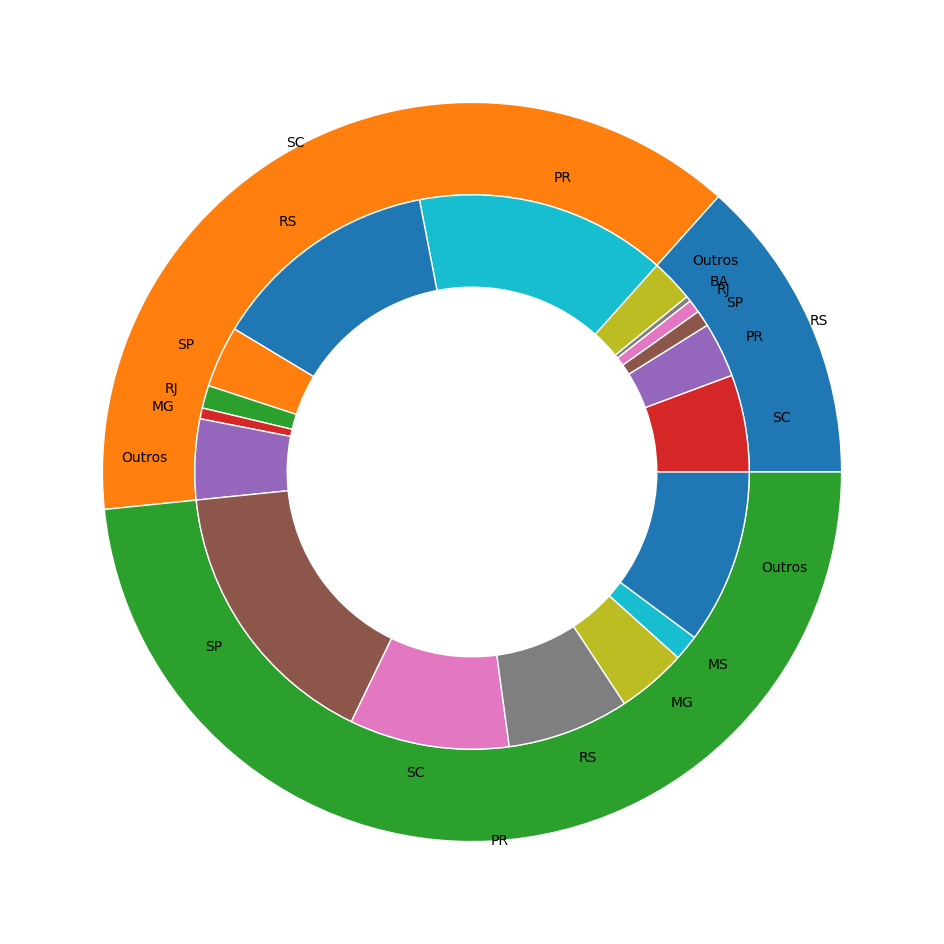

In [105]:
generate_candidature_state_origin_state_nested_pie_chart(['RS', 'SC', 'PR'])

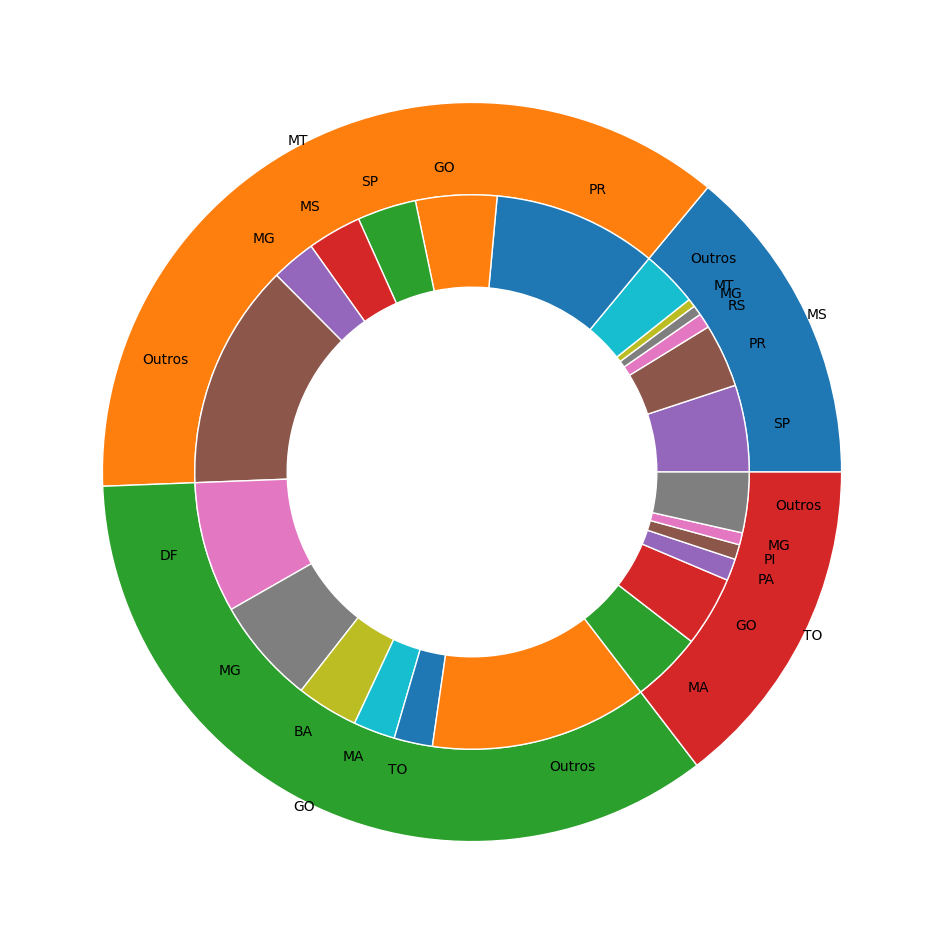

In [108]:
generate_candidature_state_origin_state_nested_pie_chart(['MS', 'MT', 'GO', 'TO'])